In [1]:
#importing libs

#selecting tf v2, importing tf and printing versions
try:
  %tensorflow_version 2.x
except Exception:
   pass
import tensorflow as tf

print(tf.__version__)
print(tf.keras.__version__)

#import other libs
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imread_collection, concatenate_images, imsave
from skimage.transform import resize
from skimage.morphology import label
import os
import sys
import random
from tqdm import tqdm

TensorFlow 2.x selected.
2.0.0
2.2.4-tf


In [2]:
#use google drive as data storege
from google.colab import drive,files
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#copy file from drive and extracting datasets

%rm -r ./drive/'My Drive'/CPP/CS4990/Final_Project/data/unzipped/*
!unzip ./drive/My\ Drive/CPP/CS4990/Final_Project/data/cs4990-fall2019-finalproject.zip -d ./drive/My\ Drive/CPP/CS4990/Final_Project/data/unzipped/ >/dev/null
!mkdir -p /content/drive/'My Drive'/CPP/CS4990/Final_Project/data/unzipped/testing_masks/testing_masks
!echo 'Unzipped all files'


Unzipped all files


In [0]:
#storing paths of datasets to variable

TRAIN_IMG = '/content/drive/My Drive/CPP/CS4990/Final_Project/data/unzipped/training_validation_Hair_Skin_Masks/training_hair_skin/images'
TRAIN_MASKS = '/content/drive/My Drive/CPP/CS4990/Final_Project/data/unzipped/training_validation_Hair_Skin_Masks/training_hair_skin/masks'

VALID_IMG = '/content/drive/My Drive/CPP/CS4990/Final_Project/data/unzipped/training_validation_Hair_Skin_Masks/validation_hair_skin/images'
VALID_MASKS = '/content/drive/My Drive/CPP/CS4990/Final_Project/data/unzipped/training_validation_Hair_Skin_Masks/validation_hair_skin/masks'

TEST_IMG = '/content/drive/My Drive/CPP/CS4990/Final_Project/data/unzipped/testing_images/testing_images'
TEST_MASKS = '/content/drive/My Drive/CPP/CS4990/Final_Project/data/unzipped/testing_masks/testing_masks'

# setting image size and channel
img_width = 256
img_height = 256
img_channel = 3

In [5]:
#getting list of training,validation and testing files

train_id = next(os.walk(TRAIN_IMG))[2]
train_mask = next(os.walk(TRAIN_MASKS))[2]
test_id = next(os.walk(TEST_IMG))[2]
valid_id = next(os.walk(VALID_IMG))[2]
valid_mask = next(os.walk(VALID_MASKS))[2]

#printing length of all file list array
print(len(train_id))
print(len(train_mask))
print(len(test_id))
print(len(valid_id))
print(len(valid_mask))

1500
1500
927
500
500


In [6]:
# reading and resizing training images to 256,256,3
# in this program, mask is also having 3 channels RGB - Hair, Skin, Background

import numpy as np

X_train = np.zeros((len(train_id), img_height, img_width, img_channel), dtype=np.uint8)
sys.stdout.flush()
for n,Id in tqdm(enumerate(train_id),total=len(train_id)):
  path = TRAIN_IMG + '/' + Id
  img = imread(path)[:,:,:img_channel]
  img = resize(img, (img_height,img_width), mode='constant', preserve_range=True)
  X_train[n] = img

print("resized training imgs")

# reading and resizing training masks
Y_train = np.zeros((len(train_mask), img_height, img_width, img_channel), dtype=np.uint8)
sys.stdout.flush()
for n,Id in tqdm(enumerate(train_mask),total=len(train_mask)):
  path = TRAIN_MASKS + '/' + Id
  mask = imread(path)[:,:,:img_channel]
  mask = resize(mask, (img_height,img_width), mode='constant', preserve_range=True)
  Y_train[n] = mask
  
print("resized training masks")

# reading and resizing validation images
X_valid = np.zeros((len(valid_id), img_height, img_width, img_channel), dtype=np.uint8)
sys.stdout.flush()
for n,Id in tqdm(enumerate(valid_id),total=len(valid_id)):
  path = VALID_IMG + '/' + Id
  img = imread(path)[:,:,:img_channel]
  img = resize(img, (img_height,img_width), mode='constant', preserve_range=True)
  X_valid[n] = img

print("resized validation imgs")

# reading and resizing validation masks
Y_valid = np.zeros((len(valid_mask), img_height, img_width, img_channel), dtype=np.uint8)
sys.stdout.flush()
for n,Id in tqdm(enumerate(valid_mask),total=len(valid_mask)):
  path = VALID_MASKS + '/' + Id
  mask = imread(path)[:,:,:img_channel]
  mask = resize(mask, (img_height,img_width), mode='constant', preserve_range=True)
  Y_valid[n] = mask
  
print("resized validation masks")

# reading and resizing testing images
X_test = np.zeros((len(test_id), img_height, img_width, img_channel), dtype=np.uint8)
sizes_test = []
sys.stdout.flush()
for n,Id in tqdm(enumerate(test_id),total=len(test_id)):
  path = TEST_IMG + '/' + Id
  img = imread(path)[:,:,:img_channel]
  sizes_test.append([img.shape[0],img.shape[1]])
  img = resize(img, (img_height,img_width), mode='constant', preserve_range=True)
  X_test[n] = img
  
print("resized testing imgs")

# changing datatype to float and normalizing color value between 0 and 1
X_train = X_train.astype('float32') / 255
Y_train = Y_train.astype('float32') / 255
X_valid = X_valid.astype('float32') / 255
Y_valid = Y_valid.astype('float32') / 255
X_test = X_test.astype('float32') / 255

100%|██████████| 1500/1500 [00:18<00:00, 82.83it/s]


resized training imgs


100%|██████████| 1500/1500 [00:16<00:00, 90.13it/s]


resized training masks


100%|██████████| 500/500 [00:06<00:00, 81.89it/s]

resized validation imgs



100%|██████████| 500/500 [00:05<00:00, 90.30it/s]


resized validation masks


100%|██████████| 927/927 [00:11<00:00, 83.99it/s]


resized testing imgs


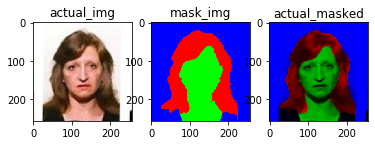

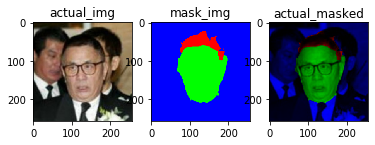

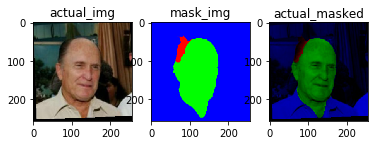

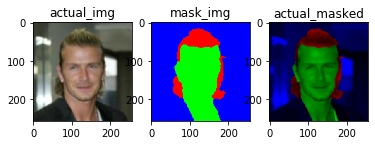

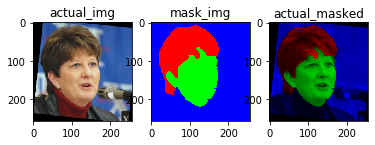

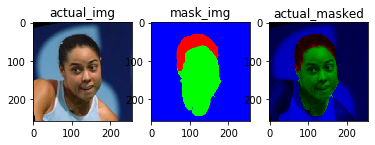

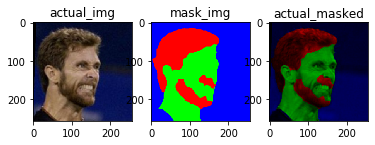

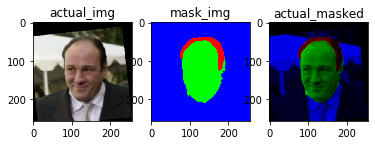

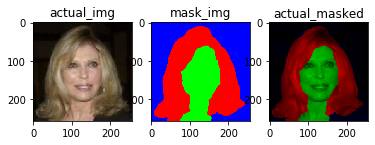

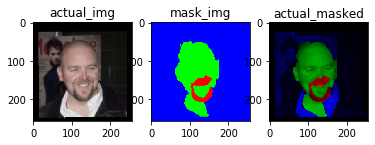

In [7]:
# visualizing masks and images

for ix in np.arange(3):
  mask=np.squeeze(Y_train[ix])
  masked=np.copy(X_train[ix]) * Y_train[ix]
  
  #plotting imgs
  f, (ax0, ax1, ax2) = plt.subplots(1,3)
  ax0.set_title('actual_img')
  ax0.imshow(X_train[ix])
  ax1.set_title('mask_img')
  ax1.imshow(mask)
  ax2.set_title('actual_masked')
  ax2.imshow(masked)
  plt.show()

In [0]:
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Input,Dense,MaxPooling2D,Dropout
from tensorflow.keras.layers import Lambda,Add
from tensorflow.keras.layers import Conv2D,Conv2DTranspose,Cropping2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.applications import VGG16

# defining metrics mean_iou (not used during this project)
def mean_iou(y_true, y_pred):
  prec = []
  for t in np.arange(0.5,1.0,0.05):
    y_pred_ = tf.to_int32(y_pred > t)
    score, up_opt = tf.metrics.mean_iou(y_true,y_pred_,3)
    K.get_session().run(tf.local_variables_initializer())
    with tf.control_dependencies([up_opt]):
      score = tf.identity(score)
    prec.append(score)
  return K.mean(K.stack(prec),axis=0)

# defining metrics dice_coef
def dice_coef(y_true, y_pred):
  y_true_f = K.flatten(y_true)
  y_pred_f = K.flatten(y_pred)
  intersection = K.sum(y_true_f * y_pred_f)
  return(2. * intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.0)

In [9]:
# Build VGG16 based model and top layers are add with inspiration from FCN8
base_model = VGG16(input_shape=X_train[0].shape, include_top=False, weights="imagenet")
base_input = base_model.input
base_output = base_model.output

pool4 = base_model.get_layer('block4_pool').output
pool3 = base_model.get_layer('block3_pool').output

conv6 = Conv2D(2048, (7, 7), activation='elu', padding='same', name='block6_conv6')(base_output)
conv6 = Dropout(0.5)(conv6)
conv7 = Conv2D(2048, (1, 1), activation='elu', padding='same', name='block7_conv7')(conv6)
conv7 = Dropout(0.5)(conv7)
conv7 = Conv2D(3, (1, 1), activation='elu', padding='valid', name='block7_conv7_bottleneck')(conv7)

u2 = Conv2DTranspose(3, kernel_size=(4, 4), strides=(2, 2), padding='valid', name='block8_u2')(conv7)
c2 = Cropping2D(((0,2),(0,2)))(u2)
pool4_n = Conv2D(3, kernel_size=(1,1), activation='elu', padding='same', name='block8_pool4_n')(pool4)
u2_skip = Add()([c2, pool4_n])

u4 = Conv2DTranspose(3, kernel_size=(4, 4), strides=(2, 2), padding='valid', name='block9_u4')(u2_skip)
c4 = Cropping2D(((0,2),(0,2)))(u4)
pool3_n = Conv2D(3, kernel_size=(1,1), activation='elu', padding='same', name='block9_pool3_n')(pool3)
u4_skip = Add()([c4, pool3_n])

output = Conv2DTranspose(3, kernel_size=(16,16), strides=(8,8), padding='valid', activation='softmax')(u4_skip)
output = Cropping2D(((0,8),(0,8)))(output)

model = Model(inputs=[base_input], outputs=[output])

# setting optimizer and matrics
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4), loss='categorical_crossentropy', metrics=[dice_coef])
model.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 256, 256, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 128, 128, 64) 0           block1_conv2[0][0]               
_____________________________

In [10]:
#defining earlystopping and adding checkpoint to save model
es = EarlyStopping(patience=5, verbose=1)
cp= ModelCheckpoint('hair_skin_seg_model.h5', verbose=1, save_best_only=True)

# training model
result= model.fit(X_train,Y_train, validation_data=(X_valid,Y_valid), batch_size=8, epochs=50, callbacks=[es, cp])

Train on 1500 samples, validate on 500 samples
Epoch 1/50
1496/1500 [============================>.] - ETA: 0s - loss: 0.6535 - dice_coef: 0.6131
Epoch 00001: val_loss improved from inf to 0.26288, saving model to hair_skin_seg_model.h5
1500/1500 [==============================] - 99s 66ms/sample - loss: 0.6523 - dice_coef: 0.6138 - val_loss: 0.2629 - val_dice_coef: 0.8481
Epoch 2/50
1496/1500 [============================>.] - ETA: 0s - loss: 0.2142 - dice_coef: 0.8820
Epoch 00002: val_loss improved from 0.26288 to 0.17314, saving model to hair_skin_seg_model.h5
1500/1500 [==============================] - 95s 63ms/sample - loss: 0.2141 - dice_coef: 0.8821 - val_loss: 0.1731 - val_dice_coef: 0.9087
Epoch 3/50
1496/1500 [============================>.] - ETA: 0s - loss: 0.1621 - dice_coef: 0.9103
Epoch 00003: val_loss improved from 0.17314 to 0.14233, saving model to hair_skin_seg_model.h5
1500/1500 [==============================] - 95s 63ms/sample - loss: 0.1622 - dice_coef: 0.9102 -

In [11]:
#predictions on testing imgs
model= load_model('hair_skin_seg_model.h5', custom_objects={'dice_coef': dice_coef})
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)],verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):],verbose=1)
preds_test = model.predict(X_test, verbose=1)


# threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

# predicted masks stored just for hair (index 0)
preds_masks = []
for i in range(len(preds_test)):
  preds_masks.append(resize(np.squeeze(preds_test[i,:,:,0]),
                         (sizes_test[i][0], sizes_test[i][1]),
                         mode='constant', preserve_range=True))

1350/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

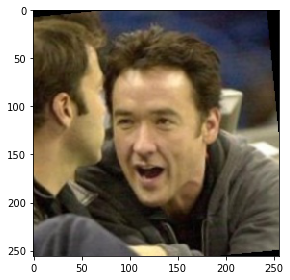

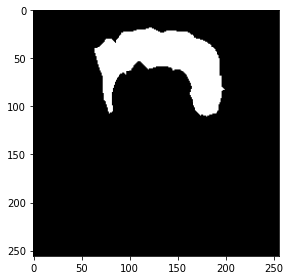

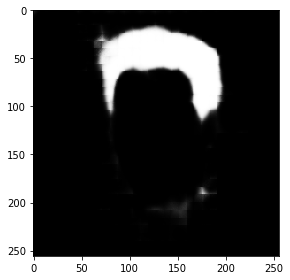

In [13]:
#visualizing prediction on training data for hair only (index 0)

ix=random.randint(0,len(preds_train))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix,:,:,0]))
plt.show()
imshow(np.squeeze(preds_train[ix,:,:,0]))
plt.show()

In [0]:
#saving mask images of test images

def savingmaskimg(pred):
  for i in range(len(pred)):
    files= test_id[i].replace('img','mask')
    imsave(os.path.join(TEST_MASKS,files), pred[i])
    
savingmaskimg(preds_masks)

#defining encoding function
def rle_encoding(x):
  dots= np.where(x.T.flatten()==1)[0]
  run_lengths = []
  prev = -2
  for b in dots:
    if (b>prev+1): run_lengths.extend((b+1,0))
    run_lengths[-1]+=1
    prev=b
  return run_lengths

#sorting mask images
masks = [f for f in os.listdir(TEST_MASKS) if f.endswith('.jpg')]
masks = sorted(masks, key=lambda s:int(s.split('_')[2].split('.')[0]))

#encoding masks
encodings = []
for file in masks:
  mask = imread(os.path.join(TEST_MASKS,file))
  mask = np.array(mask, dtype=np.uint8)
  mask = np.round(mask/255)
  encodings.append(rle_encoding(mask))
  
#saving csv file
sub = pd.DataFrame()
sub['ImageId'] = pd.Series(masks).apply(lambda x: os.path.splitext(x)[0])
sub['EncodedPixels'] = pd.Series(encodings).apply(lambda x: ' '.join(str(y) for y in x))
sub.to_csv('output.csv', index=False)

In [12]:
#storing trained model to google drive for future purpose
%cp hair_skin_seg_model.h5 /content/drive/'My Drive'/CPP/CS4990/Final_Project/
!ls -la /content/drive/'My Drive'/CPP/CS4990/Final_Project/

total 1649213
-rw------- 1 root root    535981 Dec 13 07:03  CS4990_Final_Project.ipynb
drwx------ 4 root root      4096 Dec 12 19:34  data
-rw------- 1 root root    113594 Dec  5 09:11 'Final Project.pdf'
-rw------- 1 root root 843857856 Dec 13 06:29  hair_skin_seg_model_079398.h5
-rw------- 1 root root 843857856 Dec 13 07:04  hair_skin_seg_model.h5
-rw------- 1 root root    424144 Dec 12 23:18  ML_FinalProject.ipynb


In [0]:
#Download file from colab to local
files.download('output.csv')

5


100%|██████████| 5/5 [00:02<00:00,  2.12it/s]


5/1 [======================================================================================================================================================] - 1s 276ms/sample


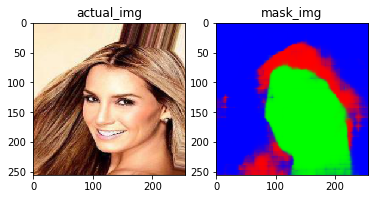

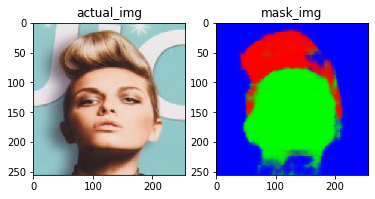

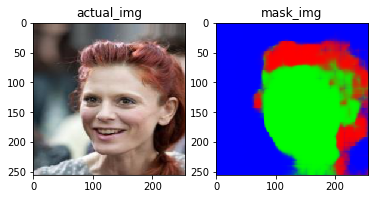

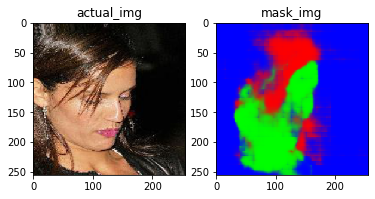

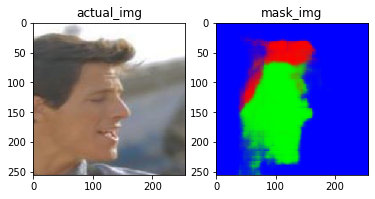

In [17]:
#celebA testing 5 images with trained model

#read images from google drive
CELEBA_IMG = '/content/drive/My Drive/CPP/CS4990/Final_Project/data/celebA'
celeb_id = next(os.walk(CELEBA_IMG))[2]
print(len(celeb_id))

Celeb_test = np.zeros((len(celeb_id), img_height, img_width, img_channel), dtype=np.uint8)
sizes_test_celeb = []
sys.stdout.flush()
for n,Id in tqdm(enumerate(celeb_id),total=len(celeb_id)):
  path = CELEBA_IMG + '/' + Id
  img = imread(path)[:,:,:img_channel]
  sizes_test_celeb.append([img.shape[0],img.shape[1]])
  img = resize(img, (img_height,img_width), mode='constant', preserve_range=True)
  Celeb_test[n] = img

#normalizing color between 0 and 1
Celeb_test = Celeb_test.astype('float32') / 255

#predict all 3 segmentation
preds_celeb = model.predict(Celeb_test, verbose=1)

#printing predicted result for each image
for ix in np.arange(len(preds_celeb)):
  #plotting imgs
  f, (ax0, ax1) = plt.subplots(1,2)
  ax0.set_title('actual_img')
  ax0.imshow(Celeb_test[ix])
  ax1.set_title('mask_img')
  ax1.imshow(np.squeeze(preds_celeb[ix]))
  plt.show()